# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
original_data = pd.read_csv('Iris.csv')

In [8]:
original_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 评估和清理数据

### 数据整齐度

In [11]:
cleaned_data = original_data.copy()

In [12]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 数据干净度

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [15]:
cleaned_data['Id'] = cleaned_data['Id'].astype('str')
cleaned_data['Id']

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [16]:
cleaned_data['Species'] = cleaned_data['Species'].astype('category')
cleaned_data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### 缺失数据

#### 重复数据

In [19]:
cleaned_data['Id'].duplicated().sum()

0

#### 不一致数据

In [21]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

#### 无效或错误数据

In [23]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


## 整理数据

In [25]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [26]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor


## 数据可视化

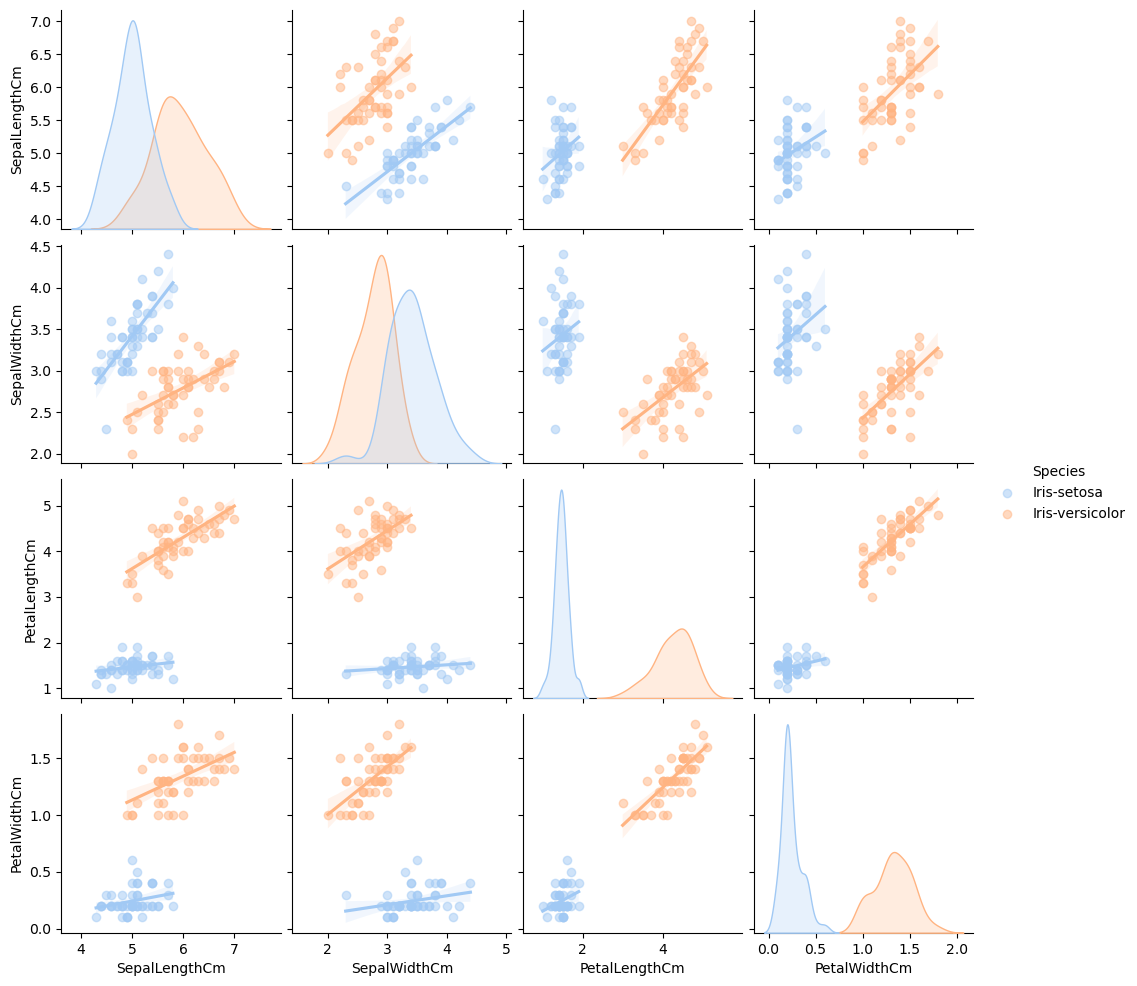

In [28]:
sns.set_palette('pastel')
sns.pairplot(cleaned_data, hue = 'Species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

## 分析数据

In [30]:
from scipy.stats import ttest_ind

### 分析萼片长度

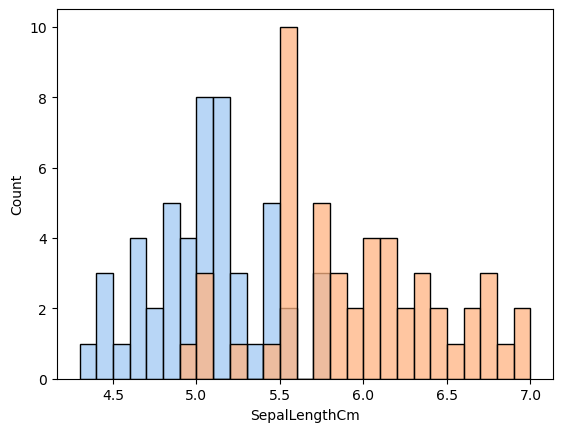

In [32]:
sns.histplot(iris_setosa['SepalLengthCm'], binwidth = 0.1)
sns.histplot(iris_versicolor['SepalLengthCm'], binwidth = 0.1)
plt.show()

#### 建立假设

$H_0$: Setosa鸢尾花和Versicolor鸢尾花萼片长度平均值不存在显著差异。

$H_1$: Setosa鸢尾花和Versicolor鸢尾花萼片长度平均值存在显著差异。

#### 确定检验是单尾还是双尾

只在乎平均值是否存在差异，所以是双尾检验。

#### 确定显著水平

In [38]:
alpha = 0.05

#### 计算t值和p值

In [40]:
t_stat, p_value = ttest_ind(iris_setosa['SepalLengthCm'], iris_versicolor['SepalLengthCm'])

In [41]:
print(t_stat, p_value)

-10.52098626754911 8.985235037487079e-18


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设$H_0$，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著差异。

后面分析步骤基本相同